In [4]:
pip install implicit

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from tqdm import tqdm

import implicit

In [6]:
data = pd.read_csv('events.csv')
data = data.drop(['timestamp'], axis = 1)

- Во всех моделях используем дефолтные значения, подобранные девелоперами библиотеки implicit
- https://benfred.github.io/implicit/
- там же ссылки на алгоритмы

In [7]:
# implicit ожидает user-item матрицу

sparse_user_id_item = sparse.csr_matrix((data['rating'], (data['user_id'], data['item_id'])))

AlternatingLeastSquares

In [8]:
# Инициализируем модель и обучаем её на user-item матрице
model_0 = implicit.cpu.als.AlternatingLeastSquares()

model_0.fit(sparse_user_id_item)

/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/15 [00:00<?, ?it/s]

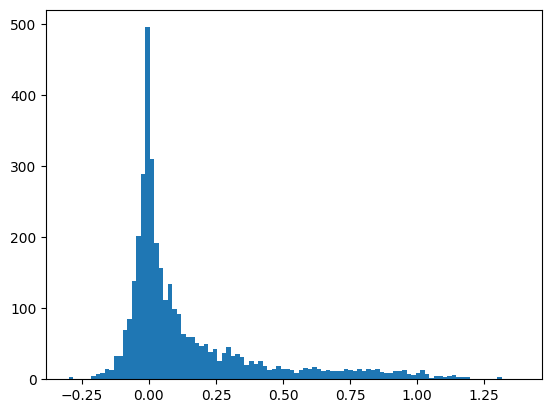

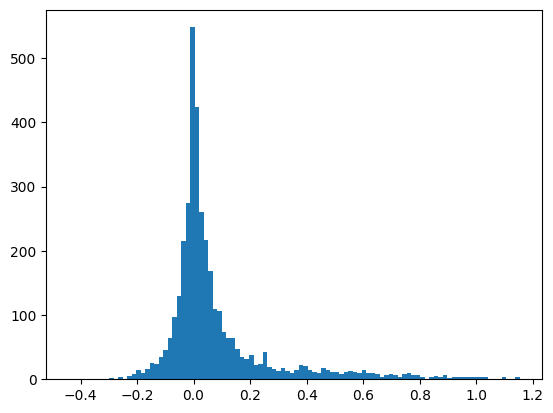

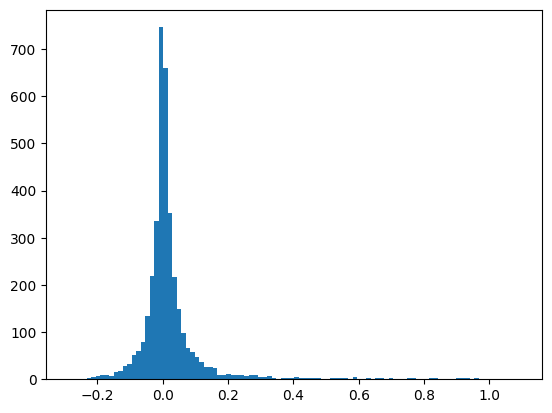

In [9]:
# посмотреть скоры для 3 рандомных юзеров
for user_id in np.random.choice(data['user_id'].unique().tolist(), 3):
    recommended_0 = model_0.recommend(user_id, sparse_user_id_item[user_id],
                                  N = 3706,
                                  filter_already_liked_items=False)

    plt.hist(recommended_0[1], bins = 100)
    plt.show()

BayesianPersonalizedRanking

In [10]:
model_1 = implicit.cpu.bpr.BayesianPersonalizedRanking()

model_1.fit(sparse_user_id_item)

  0%|          | 0/100 [00:00<?, ?it/s]

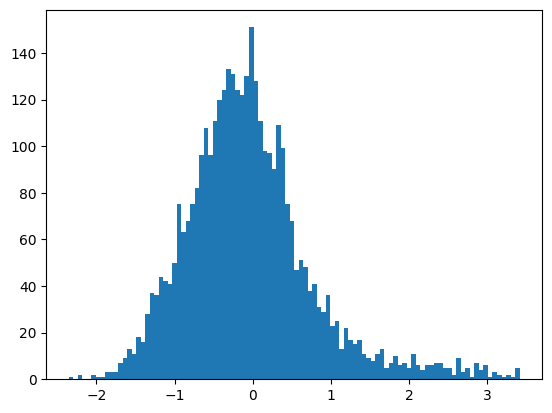

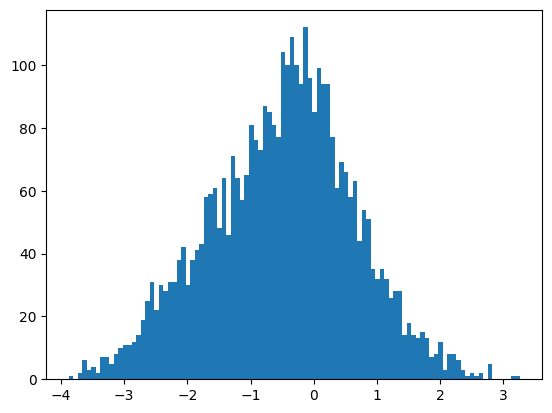

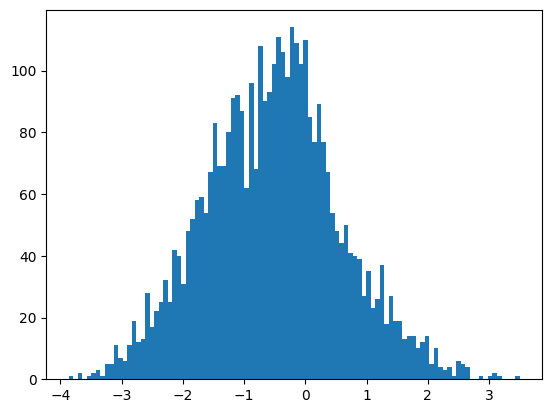

In [11]:
for user_id in np.random.choice(data['user_id'].unique().tolist(), 3):
    recommended_1 = model_1.recommend(user_id, sparse_user_id_item[user_id],
                                  N = 3706,
                                  filter_already_liked_items=False)

    plt.hist(recommended_1[1], bins = 100)
    plt.show()

LogisticMatrixFactorization

In [12]:
model_2 = implicit.cpu.lmf.LogisticMatrixFactorization()

model_2.fit(sparse_user_id_item)

  0%|          | 0/30 [00:00<?, ?it/s]

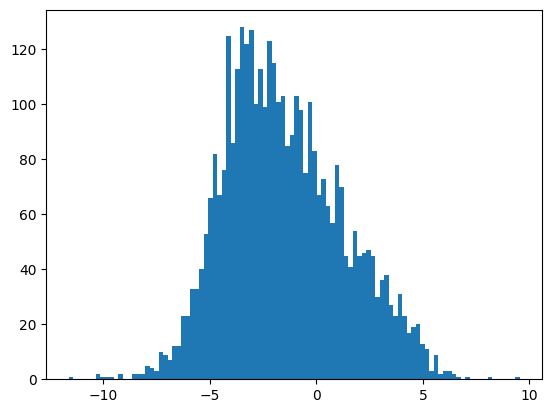

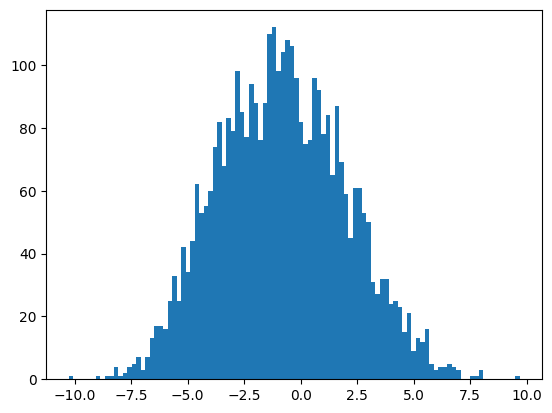

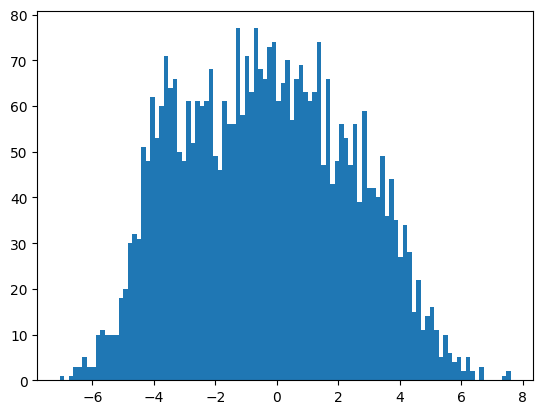

In [13]:
for user_id in np.random.choice(data['user_id'].unique().tolist(), 3):
    recommended_2 = model_2.recommend(user_id, sparse_user_id_item[user_id],
                                  N = 3706,
                                  filter_already_liked_items=False)

    plt.hist(recommended_2[1], bins = 100)
    plt.show()

In [14]:
user_item_score = []
for user_id in tqdm(data['user_id'].unique().tolist()):

    # предсказание для юзера
    recommended_0 = model_0.recommend(user_id, sparse_user_id_item[user_id],
                                  N = 3706,
                                  filter_already_liked_items=False)

    recommended_1 = model_1.recommend(user_id, sparse_user_id_item[user_id],
                                  N = 3706,
                                  filter_already_liked_items=False)

    recommended_2 = model_2.recommend(user_id, sparse_user_id_item[user_id],
                                  N = 3706,
                                  filter_already_liked_items=False)

    # словарь item - score
    dctn_item_scores_0 = dict((x,y) for x,y in zip(recommended_0[0].tolist(), recommended_0[1].tolist()))
    dctn_item_scores_1 = dict((x,y) for x,y in zip(recommended_1[0].tolist(), recommended_1[1].tolist()))
    dctn_item_scores_2 = dict((x,y) for x,y in zip(recommended_2[0].tolist(), recommended_2[1].tolist()))

    for item_id in data['item_id'].unique().tolist():

        user_item_score.append((user_id, item_id,
                                dctn_item_scores_0[item_id],
                                dctn_item_scores_1[item_id],
                                dctn_item_scores_2[item_id],
                               ))

100%|██████████| 6040/6040 [03:02<00:00, 33.04it/s]


In [15]:
data_n = pd.DataFrame(user_item_score, columns = ['user_id', 'item_id', 'als_score', 'bayes_score', 'log_score'])

In [16]:
data_n

,user_id,item_id,als_score,bayes_score,log_score
0,0,1505,1.033410,1.459946,5.894281
1,0,3669,0.815814,1.813417,4.770082
2,0,584,1.114136,2.677553,5.144463
3,0,3390,0.907189,0.186965,3.422371
4,0,2885,0.586134,0.692816,5.198762
...,...,...,...,...,...
22287595,6039,3263,-0.007290,-0.361803,-4.317341
22287596,6039,865,0.019590,0.057018,-3.669341
22287597,6039,2241,0.004837,-0.180654,-2.551609
22287598,6039,3542,-0.004974,-0.223559,-4.593063


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!ls '/content/drive/MyDrive/recsys'

In [19]:
# data_n.to_csv('/content/drive/MyDrive/recsys/data_new.csv', index = False)

https://drive.google.com/file/d/17v7RYSacXcrbD3yoavJtVApj0hbQ1CYc/view?usp=sharing